## **Code : Result ver.2**
- Writer : Donghyeon Kim
- Update : 2022.11.09.
- 대상 : 태양광 사용 가구(300W, 3kW, 18kW)
- 주택형태 : 단독주택
- 분석사항 : 용량별 SCR(자가소비율), SSR(자가공급률) 요약통계량 계산 및 그래프 시각화

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_use_final : 태양광 사용자 이름(최종) / 단독주택이라는 공통점 있음.
# get_name_not_final : 태양광 미사용자 이름(최종)
from pack_utils import get_project_root, get_name_root, get_name_use_final, get_name_not_final, get_name_use_final_3kw

### **Data**
#### 1) Hour(1시간 단위)

In [3]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_final')
file_name = os.path.join(folder_root, 'final_data_hour.xlsx')
df_all_hour = pd.read_excel(file_name)

# Filtering
# (1) Using Solar
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

# (2) Not Using Solar
df_all_hour_not = df_all_hour[df_all_hour.type == 'not']

In [4]:
df_all_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273545 entries, 0 to 273544
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    273545 non-null  int64  
 1   연도                      273545 non-null  int64  
 2   월                       273545 non-null  int64  
 3   일                       273545 non-null  int64  
 4   시간                      273545 non-null  int64  
 5   설비용량(kW)                107389 non-null  object 
 6   발전량(kWh)                107389 non-null  float64
 7   전력소비량(kWh)              273545 non-null  float64
 8   수전전력량(kWh)              273545 non-null  float64
 9   잉여전력량(kWh)              107389 non-null  float64
 10  잉여전력량/발전량               107389 non-null  float64
 11  자가소비율                   107389 non-null  float64
 12  자가공급률                   107389 non-null  float64
 13  temperature             273545 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [5]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_final')
file_name2 = os.path.join(folder_root, 'final_data_day.xlsx')
df_all_day = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_day_use = df_all_day[df_all_day.type == 'use']

# (2) Not Using Solar
df_all_day_not = df_all_day[df_all_day.type == 'not']

In [6]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11763 entries, 0 to 11762
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        11763 non-null  int64  
 1   연도          11763 non-null  int64  
 2   월           11763 non-null  int64  
 3   일           11763 non-null  int64  
 4   설비용량(kW)    4561 non-null   object 
 5   발전량(kWh)    4561 non-null   float64
 6   발전시간        4561 non-null   float64
 7   이용률         4561 non-null   float64
 8   전력소비량(kWh)  11763 non-null  float64
 9   수전전력량(kWh)  11763 non-null  float64
 10  잉여전력량(kWh)  4561 non-null   float64
 11  잉여전력량/발전량   4561 non-null   float64
 12  자가소비율       4561 non-null   float64
 13  자가공급률       4561 non-null   float64
 14  type        11763 non-null  object 
 15  owner       11763 non-null  object 
 16  ym          11763 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.5+ MB


<hr>

## **<월>**

### 2021.05

In [7]:
df_all_hour_21_5 = df_all_hour[df_all_hour.ym == '2021/5']

In [8]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.421821  0.467186  0.000000  0.000000  0.047619   
         6    31.0  0.307669  0.259045  0.000000  0.192199  0.213953   
         7    31.0  0.184825  0.184409  0.071497  0.092671  0.110193   
         8    31.0  0.122019  0.080313  0.062544  0.081667  0.100650   
         9    31.0  0.099574  0.051395  0.059504  0.074786  0.086770   
         10   31.0  0.087200  0.021059  0.058860  0.078541  0.083365   
         11   31.0  0.092199  0.038588  0.049481  0.071108  0.084866   
         12   31.0  0.088154  0.021199  0.047008  0.074704  0.089591   
         13   31.0  0.089284  0.018538  0.049050  0.078538  0.088115   
         14   31.0  0.096985  0.045644  0.043606  0.080667  0.087157   
         15   31.0  0.102014  0.056760  0.054021  0.068396  0.083023   
         16   31.0  0.127989  0.097414  0.063251  0.081739  0.097687   
         17   31.0  0.211513  0.204027  0.090640  0.115947  0.130382   
         18   31.0  0.389711  0.231628  0.000000  0.264489  0.313327   
         19   31.0  0.193548  0.401610  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.354839  0.486373  0.000000  0.000000  0.000000   
         7    31.0  0.774194  0.425024  0.000000  1.000000  1.000000   
         8    31.0  0.935484  0.249731  0.000000  1.000000  1.000000   
         9    31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         10   31.0  0.997312  0.014967  0.916666  1.000000  1.000000   
         11   31.0  0.993548  0.035921  0.800002  1.000000  1.000000   
         12   31.0  0.971272  0.069922  0.652173  0.977273  1.000000   
         13   31.0  0.965636  0.074467  0.720000  0.977273  1.000000   
         14   31.0  0.932348  0.193145  0.000000  0.953463  1.000000   
         15   31.0  0.943567  0.187492  0.000000  1.000000  1.000000   
         16   31.0  0.962366  0.181096  0.000000  1.000000  1.000000   
         17   31.0  0.870968  0.340777  0.000000  1.000000  1.000000   
         18   31.0  0.774194  0.425024  0.000000  1.000000  1.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   274.0  0.288321  0.453810  0.000000  0.0

In [9]:
# SSR(자가공급률)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.103519  0.156370  0.000000  0.000000  0.004859   
         6    31.0  0.790288  0.349208  0.000000  0.704710  1.000000   
         7    31.0  0.956429  0.119430  0.499373  1.000000  1.000000   
         8    31.0  0.981208  0.063845  0.722029  1.000000  1.000000   
         9    31.0  0.997308  0.014987  0.916555  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  0.968987  0.134036  0.288398  1.000000  1.000000   
         16   31.0  0.975844  0.088605  0.625238  1.000000  1.000000   
         17   31.0  0.927480  0.199145  0.190628  1.000000  1.000000   
         18   31.0  0.709702  0.322164  0.000000  0.565593  0.863605   
         19   31.0  0.014290  0.030341  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.013587  0.021550  0.000000  0.000000  0.000000   
         7    31.0  0.034346  0.032497  0.000000  0.009983  0.029850   
         8    31.0  0.041125  0.032658  0.000000  0.015210  0.038762   
         9    31.0  0.135713  0.106175  0.000000  0.062895  0.116884   
         10   31.0  0.249545  0.159181  0.037037  0.116244  0.235314   
         11   31.0  0.330037  0.214803  0.031746  0.161272  0.288880   
         12   31.0  0.450795  0.287487  0.038462  0.218072  0.333333   
         13   31.0  0.484234  0.318803  0.026668  0.160863  0.446796   
         14   31.0  0.482071  0.304191  0.000000  0.165129  0.578897   
         15   31.0  0.391013  0.307466  0.000000  0.127556  0.349206   
         16   31.0  0.300407  0.272666  0.000000  0.053240  0.259247   
         17   31.0  0.180787  0.177770  0.000000  0.043840  0.142834   
         18   31.0  0.064765  0.064443  0.000000  0.007990  0.052635   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   274.0  0.011396  0.022541  0.000000  0.0

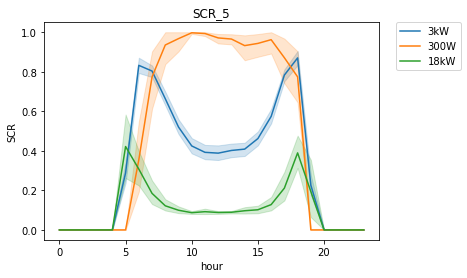

In [10]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_5')
plt.show()

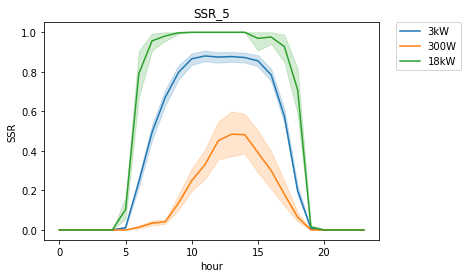

In [11]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_5')
plt.show()

<hr>

### 2021.06

In [12]:
df_all_hour_21_6 = df_all_hour[df_all_hour.ym == '2021/6']

In [13]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.606537  0.365378  0.000000  0.412884  0.628049   
         6    30.0  0.210488  0.135184  0.095293  0.133210  0.153792   
         7    29.0  0.111857  0.033607  0.073989  0.084556  0.106880   
         8    29.0  0.089388  0.038022  0.053010  0.069053  0.079781   
         9    30.0  0.085163  0.024299  0.059478  0.066403  0.083350   
         10   30.0  0.078040  0.019519  0.049898  0.060702  0.080050   
         11   30.0  0.078736  0.017314  0.053530  0.061977  0.079095   
         12   30.0  0.085738  0.020334  0.060218  0.074604  0.079086   
         13   30.0  0.076164  0.025999  0.046645  0.053020  0.066973   
         14   30.0  0.074056  0.018234  0.043968  0.060995  0.068792   
         15   30.0  0.087270  0.023294  0.039872  0.069469  0.086963   
         16   29.0  0.116619  0.068385  0.065424  0.071991  0.095697   
         17   29.0  0.156287  0.125909  0.000000  0.099064  0.128444   
         18   29.0  0.294749  0.199790  0.000000  0.188252  0.224664   
         19   29.0  0.535371  0.447350  0.000000  0.000000  0.569444   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.566667  0.504007  0.000000  0.000000  1.000000   
         7    30.0  0.833333  0.379049  0.000000  1.000000  1.000000   
         8    30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         9    30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   29.0  0.997126  0.015474  0.916668  1.000000  1.000000   
         11   29.0  0.989548  0.026658  0.916663  1.000000  1.000000   
         12   29.0  0.987133  0.030020  0.888889  1.000000  1.000000   
         13   30.0  0.978278  0.059368  0.739134  1.000000  1.000000   
         14   30.0  0.970810  0.065507  0.739134  1.000000  1.000000   
         15   30.0  0.956976  0.186060  0.000000  1.000000  1.000000   
         16   30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         17   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         18   30.0  0.866667  0.345746  0.000000  1.000000  1.000000   
         19   30.0  0.100000  0.305129  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   259.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   255.0  0.520914  0.499997  0.000000  0.0

In [14]:
# SSR(자가공급률)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.211137  0.135369  0.000000  0.127763  0.230475   
         6    30.0  0.904322  0.189482  0.250191  0.943639  1.000000   
         7    29.0  0.997541  0.013241  0.928696  1.000000  1.000000   
         8    29.0  0.988514  0.061856  0.666893  1.000000  1.000000   
         9    30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   29.0  0.968724  0.168424  0.093010  1.000000  1.000000   
         17   29.0  0.945594  0.204504  0.000000  1.000000  1.000000   
         18   29.0  0.790121  0.320066  0.000000  0.635820  0.958267   
         19   29.0  0.088675  0.108819  0.000000  0.000000  0.065206   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.020426  0.021940  0.000000  0.000000  0.017271   
         7    30.0  0.046513  0.033101  0.000000  0.021470  0.046920   
         8    30.0  0.073960  0.059867  0.000000  0.038376  0.057028   
         9    30.0  0.154846  0.093219  0.013891  0.089389  0.141736   
         10   29.0  0.305528  0.173485  0.047619  0.158541  0.285711   
         11   29.0  0.277964  0.201953  0.034967  0.111111  0.222269   
         12   29.0  0.355856  0.246992  0.012051  0.124090  0.323075   
         13   30.0  0.405387  0.269401  0.014278  0.152374  0.415047   
         14   30.0  0.411593  0.250978  0.021509  0.198810  0.405014   
         15   30.0  0.314403  0.216768  0.000000  0.164726  0.284690   
         16   30.0  0.260812  0.172846  0.000000  0.131305  0.203328   
         17   30.0  0.140981  0.103624  0.021743  0.063529  0.119634   
         18   30.0  0.056248  0.056252  0.000000  0.018036  0.039470   
         19   30.0  0.000917  0.002855  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   259.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   255.0  0.028923  0.039864  0.000000  0.0

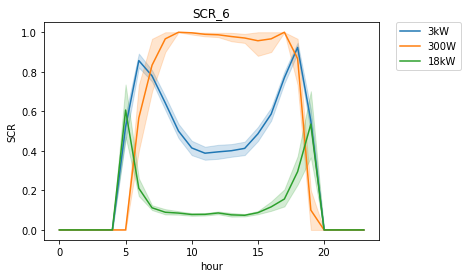

In [15]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_6')
plt.show()

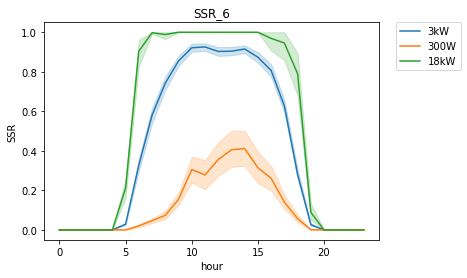

In [16]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_6')
plt.show()

<hr>

### 2021.07

In [17]:
df_all_hour_21_7 = df_all_hour[df_all_hour.ym == '2021/7']

In [18]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.397871  0.469817  0.000000  0.000000  0.000000   
         6    31.0  0.299872  0.160402  0.000000  0.219514  0.298834   
         7    31.0  0.200117  0.164505  0.090909  0.130464  0.151548   
         8    31.0  0.118989  0.048058  0.067776  0.094616  0.104581   
         9    31.0  0.125294  0.088283  0.062241  0.093234  0.106254   
         10   31.0  0.112935  0.047837  0.064164  0.090443  0.101963   
         11   31.0  0.140361  0.163554  0.062938  0.092680  0.104410   
         12   31.0  0.127791  0.164032  0.056732  0.077750  0.097202   
         13   31.0  0.103043  0.030128  0.047476  0.086602  0.093259   
         14   31.0  0.116304  0.029116  0.068298  0.099511  0.109733   
         15   31.0  0.166988  0.176675  0.062589  0.090833  0.123656   
         16   30.0  0.167310  0.096011  0.057609  0.105108  0.127337   
         17   30.0  0.304307  0.219939  0.072621  0.158862  0.206014   
         18   30.0  0.610878  0.276132  0.196078  0.385243  0.565756   
         19   30.0  0.541674  0.496305  0.000000  0.000000  0.955752   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    29.0  0.413793  0.501230  0.000000  0.000000  0.000000   
         7    29.0  0.896552  0.309934  0.000000  1.000000  1.000000   
         8    29.0  0.965517  0.185695  0.000000  1.000000  1.000000   
         9    29.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   29.0  0.996865  0.016881  0.909092  1.000000  1.000000   
         11   29.0  0.997537  0.013264  0.928571  1.000000  1.000000   
         12   29.0  0.994241  0.017274  0.941176  1.000000  1.000000   
         13   29.0  0.985926  0.040849  0.842107  1.000000  1.000000   
         14   29.0  0.994992  0.019679  0.904762  1.000000  1.000000   
         15   29.0  0.993788  0.024369  0.882352  1.000000  1.000000   
         16   28.0  0.926190  0.261895  0.000000  1.000000  1.000000   
         17   28.0  0.961309  0.189055  0.000000  1.000000  1.000000   
         18   28.0  0.857143  0.356348  0.000000  1.000000  1.000000   
         19   28.0  0.107143  0.314970  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   269.0  0.263941  0.441589  0.000000  0.0

In [19]:
# SSR(자가공급률)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.055857  0.094755  0.000000  0.000000  0.000000   
         6    31.0  0.780957  0.296276  0.000000  0.768848  0.906265   
         7    31.0  0.947047  0.186683  0.044533  1.000000  1.000000   
         8    31.0  0.994070  0.024494  0.874984  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  0.970087  0.166550  0.072687  1.000000  1.000000   
         12   31.0  0.971494  0.158714  0.116316  1.000000  1.000000   
         13   31.0  0.998657  0.007480  0.958352  1.000000  1.000000   
         14   31.0  0.984257  0.058034  0.719628  1.000000  1.000000   
         15   31.0  0.944980  0.201750  0.027144  1.000000  1.000000   
         16   30.0  0.971007  0.111974  0.400203  1.000000  1.000000   
         17   30.0  0.930001  0.180014  0.250191  0.970932  1.000000   
         18   30.0  0.668897  0.332891  0.033702  0.399971  0.800316   
         19   30.0  0.040158  0.056993  0.000000  0.000000  0.020962   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    29.0  0.013863  0.018322  0.000000  0.000000  0.000000   
         7    29.0  0.032507  0.023903  0.000000  0.011906  0.025312   
         8    29.0  0.039032  0.039825  0.000000  0.014491  0.027770   
         9    29.0  0.115447  0.077589  0.006668  0.061219  0.102019   
         10   29.0  0.202840  0.115528  0.018022  0.125044  0.212114   
         11   29.0  0.263094  0.160410  0.049992  0.127669  0.263319   
         12   29.0  0.310601  0.216060  0.024290  0.141599  0.299983   
         13   29.0  0.365783  0.276435  0.023473  0.129027  0.297899   
         14   29.0  0.320637  0.232248  0.014711  0.126580  0.249979   
         15   29.0  0.283761  0.228117  0.016950  0.129020  0.179982   
         16   28.0  0.218019  0.199208  0.000000  0.050457  0.174113   
         17   28.0  0.152309  0.167644  0.000000  0.035367  0.084010   
         18   28.0  0.048218  0.059788  0.000000  0.008194  0.025479   
         19   28.0  0.000916  0.002959  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   269.0  0.008771  0.018365  0.000000  0.0

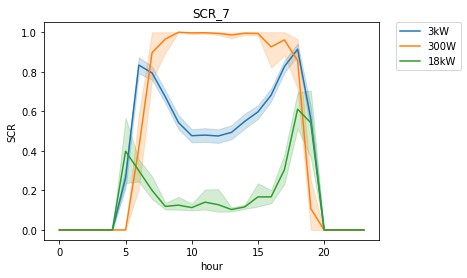

In [20]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_7')
plt.show()

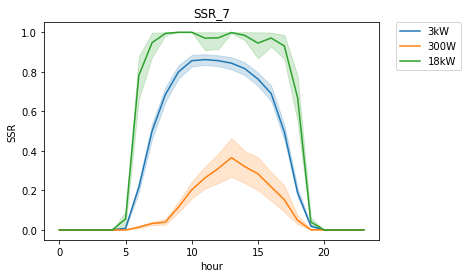

In [21]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_7')
plt.show()

<hr>

### 2021.08

In [22]:
df_all_hour_21_8 = df_all_hour[df_all_hour.ym == '2021/8']

In [23]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.032258  0.179605  0.000000  0.000000  0.000000   
         6    31.0  0.483271  0.298410  0.000000  0.245525  0.485488   
         7    31.0  0.234814  0.214826  0.000000  0.138940  0.160553   
         8    31.0  0.168284  0.145585  0.071747  0.092534  0.103906   
         9    31.0  0.120417  0.054061  0.000000  0.092392  0.107216   
         10   31.0  0.162384  0.194279  0.078013  0.091796  0.111431   
         11   31.0  0.122532  0.068952  0.057218  0.090212  0.103241   
         12   31.0  0.116417  0.052771  0.078162  0.087286  0.104305   
         13   31.0  0.140558  0.107564  0.072630  0.094189  0.106970   
         14   31.0  0.139251  0.081938  0.000000  0.097256  0.111909   
         15   31.0  0.182491  0.181232  0.077295  0.102790  0.124562   
         16   30.0  0.166833  0.132057  0.000000  0.109600  0.118740   
         17   30.0  0.304463  0.216865  0.123806  0.165944  0.217151   
         18   30.0  0.622599  0.280322  0.000000  0.427364  0.573112   
         19   30.0  0.033333  0.182574  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.225806  0.425024  0.000000  0.000000  0.000000   
         7    31.0  0.741935  0.444803  0.000000  0.500000  1.000000   
         8    31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  0.964516  0.179904  0.000000  1.000000  1.000000   
         11   31.0  0.965054  0.179730  0.000000  1.000000  1.000000   
         12   31.0  0.948705  0.183822  0.000000  1.000000  1.000000   
         13   31.0  0.975528  0.054580  0.761895  1.000000  1.000000   
         14   31.0  0.987390  0.034902  0.866661  1.000000  1.000000   
         15   31.0  0.957610  0.180862  0.000000  1.000000  1.000000   
         16   31.0  0.960033  0.181249  0.000000  1.000000  1.000000   
         17   31.0  0.900293  0.300004  0.000000  1.000000  1.000000   
         18   31.0  0.548387  0.505879  0.000000  0.000000  1.000000   
         19   31.0  0.064516  0.249731  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.025735  0.158636  0.000000  0.0

In [24]:
# SSR(자가공급률)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.001382  0.007694  0.000000  0.000000  0.000000   
         6    31.0  0.507293  0.295722  0.000000  0.339465  0.562047   
         7    31.0  0.873282  0.271452  0.000000  0.922386  1.000000   
         8    31.0  0.980197  0.057882  0.748753  1.000000  1.000000   
         9    31.0  0.966504  0.179508  0.000000  1.000000  1.000000   
         10   31.0  0.948621  0.200383  0.108770  1.000000  1.000000   
         11   31.0  0.970543  0.114041  0.536102  1.000000  1.000000   
         12   31.0  0.991953  0.044806  0.750533  1.000000  1.000000   
         13   31.0  0.984462  0.062894  0.665077  1.000000  1.000000   
         14   31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         15   31.0  0.960214  0.141398  0.319158  1.000000  1.000000   
         16   30.0  0.942270  0.193030  0.000000  1.000000  1.000000   
         17   30.0  0.939092  0.179450  0.150766  1.000000  1.000000   
         18   30.0  0.465676  0.319877  0.000000  0.116459  0.561471   
         19   30.0  0.003707  0.020303  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.008181  0.015861  0.000000  0.000000  0.000000   
         7    31.0  0.022117  0.023647  0.000000  0.005374  0.016145   
         8    31.0  0.048750  0.038219  0.000000  0.018493  0.036373   
         9    31.0  0.142630  0.088618  0.006990  0.084520  0.125016   
         10   31.0  0.216281  0.142487  0.000000  0.115286  0.184165   
         11   31.0  0.275992  0.175219  0.000000  0.153819  0.232500   
         12   31.0  0.335084  0.225159  0.000000  0.143188  0.341446   
         13   31.0  0.335279  0.243289  0.019607  0.117518  0.349997   
         14   31.0  0.329098  0.234721  0.025646  0.105553  0.302917   
         15   31.0  0.319811  0.234025  0.000000  0.085983  0.333384   
         16   31.0  0.225043  0.186613  0.000000  0.076568  0.200000   
         17   31.0  0.127140  0.136583  0.000000  0.031382  0.081059   
         18   31.0  0.026712  0.047858  0.000000  0.000000  0.010052   
         19   31.0  0.000318  0.001232  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.001753  0.023338  0.000000  0.0

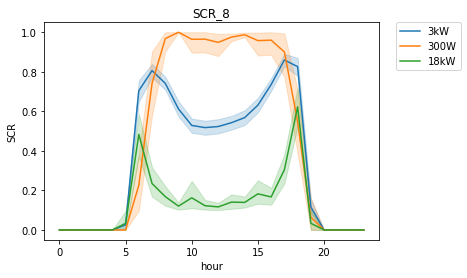

In [25]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_8')
plt.show()

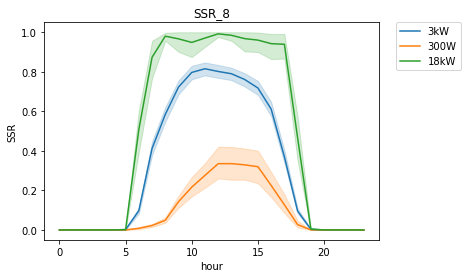

In [26]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_8')
plt.show()

<hr>

### 2021.09

In [27]:
df_all_hour_21_9 = df_all_hour[df_all_hour.ym == '2021/9']

In [28]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.565431  0.346458  0.000000  0.414298  0.512195   
         7    30.0  0.247231  0.190898  0.100671  0.131681  0.185585   
         8    30.0  0.144139  0.165085  0.068566  0.091353  0.101920   
         9    30.0  0.113052  0.047674  0.064117  0.085854  0.094560   
         10   29.0  0.116297  0.057171  0.065356  0.096516  0.101569   
         11   30.0  0.088247  0.039161  0.039248  0.070790  0.078066   
         12   30.0  0.112319  0.045326  0.073351  0.090014  0.096087   
         13   30.0  0.120509  0.037372  0.072859  0.099929  0.110368   
         14   30.0  0.111485  0.046358  0.062025  0.087425  0.097151   
         15   30.0  0.094947  0.029857  0.047828  0.078264  0.089774   
         16   30.0  0.149923  0.101001  0.094146  0.119060  0.130417   
         17   30.0  0.296424  0.117376  0.000000  0.236751  0.300550   
         18   30.0  0.450396  0.474358  0.000000  0.000000  0.288548   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.666667  0.479463  0.000000  0.000000  1.000000   
         8    30.0  0.900000  0.305129  0.000000  1.000000  1.000000   
         9    30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         10   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   30.0  0.974556  0.044786  0.857158  0.953126  1.000000   
         12   29.0  0.958705  0.071476  0.736846  0.944442  1.000000   
         13   30.0  0.961162  0.065829  0.789475  0.941994  1.000000   
         14   30.0  0.953855  0.082963  0.750006  0.946434  1.000000   
         15   30.0  0.954503  0.182569  0.000000  1.000000  1.000000   
         16   30.0  0.959127  0.182609  0.000000  1.000000  1.000000   
         17   30.0  0.900000  0.305129  0.000000  1.000000  1.000000   
         18   30.0  0.166667  0.379049  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   263.0  0.003802  0.061663  0.000000  0.0

In [29]:
# SSR(자가공급률)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.232480  0.187115  0.000000  0.090026  0.218221   
         7    30.0  0.888037  0.185900  0.226575  0.826077  1.000000   
         8    30.0  0.963761  0.167682  0.093213  1.000000  1.000000   
         9    30.0  0.998613  0.007600  0.958376  1.000000  1.000000   
         10   29.0  0.982896  0.070918  0.637344  1.000000  1.000000   
         11   30.0  0.993934  0.033228  0.818005  1.000000  1.000000   
         12   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   30.0  0.981492  0.101375  0.444746  1.000000  1.000000   
         17   30.0  0.839590  0.217321  0.000000  0.792497  0.902540   
         18   30.0  0.074302  0.102965  0.000000  0.000000  0.044173   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.021940  0.026282  0.000000  0.000000  0.018565   
         8    30.0  0.033692  0.023434  0.000000  0.017964  0.033257   
         9    30.0  0.123503  0.070007  0.000000  0.069563  0.126390   
         10   30.0  0.153754  0.117371  0.021762  0.062829  0.112265   
         11   30.0  0.319646  0.181266  0.068984  0.152093  0.333212   
         12   29.0  0.422918  0.251231  0.069778  0.209281  0.400171   
         13   30.0  0.450183  0.267430  0.071440  0.183395  0.438644   
         14   30.0  0.457361  0.251012  0.066677  0.256452  0.439880   
         15   30.0  0.348572  0.213056  0.000000  0.212749  0.337771   
         16   30.0  0.210819  0.186456  0.000000  0.083099  0.166664   
         17   30.0  0.101789  0.111051  0.000000  0.027486  0.054871   
         18   30.0  0.008987  0.023658  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   263.0  0.000047  0.000762  0.000000  0.0

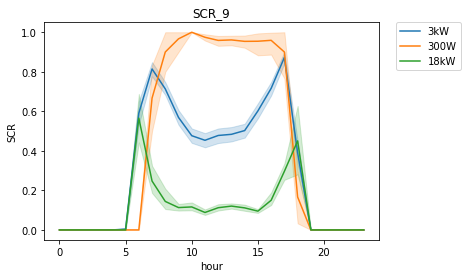

In [30]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_9')
plt.show()

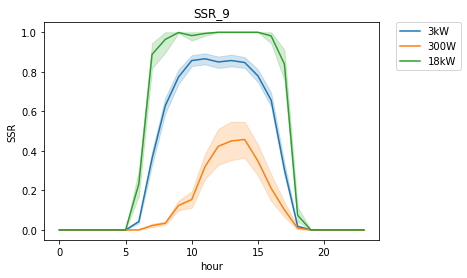

In [31]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_9')
plt.show()

<hr>

### 2021.10

In [32]:
df_all_hour_21_10 = df_all_hour[df_all_hour.ym == '2021/10']

In [33]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.384559  0.472020  0.000000  0.000000  0.000000   
         7    31.0  0.163374  0.080822  0.082966  0.113824  0.149231   
         8    31.0  0.096836  0.055761  0.056933  0.067953  0.087278   
         9    31.0  0.098246  0.042803  0.036874  0.085449  0.093730   
         10   31.0  0.079023  0.028233  0.042635  0.065285  0.071002   
         11   31.0  0.086050  0.033743  0.051621  0.078302  0.081979   
         12   31.0  0.096167  0.020295  0.070641  0.084397  0.094704   
         13   31.0  0.091587  0.032463  0.054996  0.071493  0.082120   
         14   31.0  0.092050  0.039778  0.040873  0.074506  0.087024   
         15   31.0  0.114983  0.061560  0.070516  0.090408  0.098619   
         16   31.0  0.136543  0.057442  0.000000  0.103097  0.124206   
         17   31.0  0.476322  0.348834  0.000000  0.252607  0.299020   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.290323  0.461414  0.000000  0.000000  0.000000   
         8    31.0  0.870968  0.340777  0.000000  1.000000  1.000000   
         9    31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  0.967681  0.069716  0.699996  0.974999  1.000000   
         13   31.0  0.977026  0.064568  0.714294  1.000000  1.000000   
         14   31.0  0.946793  0.184011  0.000000  1.000000  1.000000   
         15   31.0  0.926747  0.250051  0.000000  1.000000  1.000000   
         16   31.0  0.834677  0.372753  0.000000  1.000000  1.000000   
         17   31.0  0.193548  0.401610  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.000000  0.0

In [34]:
# SSR(자가공급률)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.056186  0.077148  0.000000  0.000000  0.000000   
         7    31.0  0.897365  0.205932  0.111541  0.904358  1.000000   
         8    31.0  0.994129  0.032687  0.818005  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  0.998215  0.009938  0.944669  1.000000  1.000000   
         16   31.0  0.953129  0.181837  0.000000  1.000000  1.000000   
         17   31.0  0.322248  0.270464  0.000000  0.100086  0.222373   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.006471  0.010854  0.000000  0.000000  0.000000   
         8    31.0  0.026101  0.021239  0.000000  0.011395  0.022719   
         9    31.0  0.083398  0.055420  0.000000  0.036039  0.071403   
         10   31.0  0.123513  0.075223  0.020839  0.057179  0.117658   
         11   31.0  0.182858  0.112100  0.024590  0.080127  0.178593   
         12   31.0  0.378488  0.253835  0.013877  0.219183  0.315778   
         13   31.0  0.346815  0.257423  0.028177  0.139602  0.318299   
         14   31.0  0.282770  0.244988  0.000000  0.107837  0.165145   
         15   31.0  0.249144  0.198389  0.000000  0.132858  0.258663   
         16   31.0  0.136609  0.147057  0.000000  0.043037  0.079944   
         17   31.0  0.010235  0.023318  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.000000  0.0

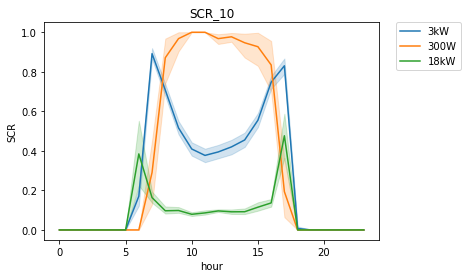

In [35]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_10')
plt.show()

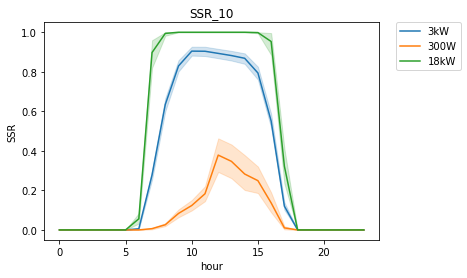

In [36]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_10')
plt.show()

<hr>

### 2021.11

In [37]:
df_all_hour_21_11 = df_all_hour[df_all_hour.ym == '2021/11']

In [38]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.244033  0.221876  0.000000  0.141273  0.182910   
         8    30.0  0.103534  0.056276  0.000000  0.077903  0.089379   
         9    30.0  0.122824  0.167681  0.044960  0.077661  0.089191   
         10   30.0  0.128416  0.193399  0.059814  0.070044  0.077230   
         11   30.0  0.131592  0.153901  0.077672  0.083494  0.094561   
         12   30.0  0.107467  0.105282  0.059879  0.073991  0.083025   
         13   30.0  0.127761  0.189639  0.062877  0.074863  0.079528   
         14   30.0  0.137525  0.155242  0.066434  0.089003  0.095181   
         15   30.0  0.133289  0.111934  0.066715  0.081173  0.097976   
         16   30.0  0.252882  0.118027  0.121635  0.188223  0.211292   
         17   30.0  0.217460  0.409192  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.766667  0.430183  0.000000  1.000000  1.000000   
         9    30.0  0.933333  0.253708  0.000000  1.000000  1.000000   
         10   30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         11   30.0  0.991071  0.034062  0.857123  1.000000  1.000000   
         12   30.0  0.966903  0.077059  0.642854  1.000000  1.000000   
         13   30.0  0.961998  0.084363  0.588230  0.946427  1.000000   
         14   30.0  0.934897  0.193436  0.000000  1.000000  1.000000   
         15   30.0  0.949311  0.183789  0.000000  1.000000  1.000000   
         16   30.0  0.866667  0.345746  0.000000  1.000000  1.000000   
         17   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.000000  0.0

In [39]:
# SSR(자가공급률)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.478086  0.225569  0.000000  0.286113  0.521408   
         8    30.0  0.964437  0.182561  0.000000  1.000000  1.000000   
         9    30.0  0.967685  0.176998  0.030540  1.000000  1.000000   
         10   30.0  0.963281  0.147074  0.274564  1.000000  1.000000   
         11   30.0  0.970213  0.120265  0.400244  1.000000  1.000000   
         12   30.0  0.977172  0.087095  0.634105  1.000000  1.000000   
         13   30.0  0.957267  0.179659  0.068244  1.000000  1.000000   
         14   30.0  0.967970  0.128112  0.369408  1.000000  1.000000   
         15   30.0  0.962300  0.138011  0.274564  1.000000  1.000000   
         16   30.0  0.897701  0.175346  0.363838  0.892885  0.970418   
         17   30.0  0.022607  0.047646  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.021735  0.020058  0.000000  0.006073  0.020454   
         9    30.0  0.088939  0.065304  0.000000  0.017064  0.098007   
         10   30.0  0.146160  0.109185  0.000000  0.049339  0.120203   
         11   30.0  0.262963  0.158642  0.020202  0.094691  0.314362   
         12   30.0  0.409384  0.263159  0.044122  0.202580  0.339353   
         13   30.0  0.374024  0.265060  0.023127  0.108982  0.367573   
         14   30.0  0.353129  0.259902  0.000000  0.154525  0.267175   
         15   30.0  0.238607  0.195728  0.000000  0.072759  0.183464   
         16   30.0  0.047418  0.038196  0.000000  0.017093  0.041968   
         17   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.000000  0.0

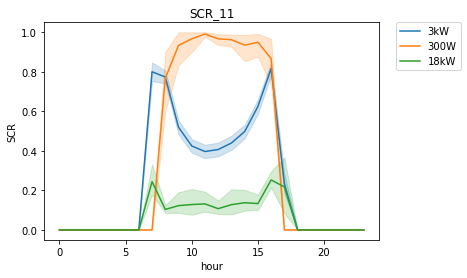

In [40]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_11')
plt.show()

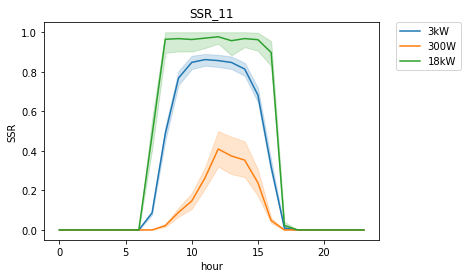

In [41]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_11')
plt.show()

<hr>

### 2021.12

In [42]:
df_all_hour_21_12 = df_all_hour[df_all_hour.ym == '2021/12']

In [43]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.492010  0.383385  0.000000  0.167117  0.450000   
         8    31.0  0.142944  0.160519  0.074219  0.100407  0.113254   
         9    31.0  0.068771  0.035979  0.029958  0.049181  0.057965   
         10   31.0  0.084674  0.019371  0.053496  0.071628  0.083685   
         11   31.0  0.084112  0.014216  0.056876  0.074101  0.080618   
         12   31.0  0.075434  0.020754  0.051652  0.059978  0.073171   
         13   30.0  0.085946  0.016789  0.036973  0.076320  0.087941   
         14   31.0  0.080798  0.012992  0.054870  0.073999  0.079318   
         15   31.0  0.086354  0.014180  0.058339  0.076986  0.083063   
         16   31.0  0.249920  0.105089  0.121094  0.174606  0.218321   
         17   30.0  0.033333  0.182574  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.133333  0.345746  0.000000  0.000000  0.000000   
         9    30.0  0.733333  0.449776  0.000000  0.250000  1.000000   
         10   31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  0.979182  0.049910  0.785712  1.000000  1.000000   
         13   31.0  0.949010  0.183293  0.000000  1.000000  1.000000   
         14   31.0  0.968844  0.068716  0.764704  1.000000  1.000000   
         15   31.0  0.961290  0.181985  0.000000  1.000000  1.000000   
         16   31.0  0.612903  0.495138  0.000000  0.000000  1.000000   
         17   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   275.0  0.000000  0.000000  0.000000  0.0

In [44]:
# SSR(자가공급률)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.115457  0.101300  0.000000  0.050309  0.088963   
         8    31.0  0.975910  0.125621  0.300598  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   31.0  0.865604  0.133713  0.571678  0.803310  0.899756   
         17   30.0  0.002038  0.011160  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.002212  0.007279  0.000000  0.000000  0.000000   
         9    30.0  0.040582  0.041857  0.000000  0.003519  0.031282   
         10   31.0  0.091108  0.074540  0.000000  0.043493  0.071440   
         11   31.0  0.243399  0.123672  0.007996  0.144369  0.240049   
         12   31.0  0.411077  0.243931  0.060607  0.192546  0.382957   
         13   31.0  0.408794  0.261229  0.000000  0.150781  0.425018   
         14   31.0  0.355506  0.284814  0.040039  0.118072  0.196122   
         15   31.0  0.243287  0.185792  0.000000  0.105507  0.200000   
         16   31.0  0.023582  0.022076  0.000000  0.000000  0.027774   
         17   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   275.0  0.000000  0.000000  0.000000  0.0

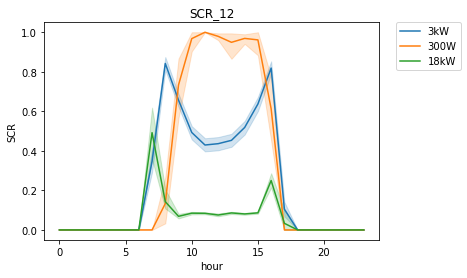

In [45]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_12')
plt.show()

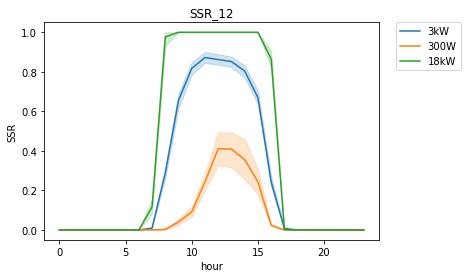

In [46]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_12')
plt.show()

<hr>

### 2022.01

In [47]:
df_all_hour_22_1 = df_all_hour[df_all_hour.ym == '2022/1']

In [48]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.613911  0.456601  0.000000  0.000000  1.000000   
         8    31.0  0.143809  0.048378  0.073501  0.112433  0.133846   
         9    31.0  0.072188  0.024755  0.040772  0.057132  0.067612   
         10   31.0  0.081409  0.012802  0.053649  0.074635  0.079882   
         11   31.0  0.071317  0.015121  0.038317  0.061378  0.073969   
         12   31.0  0.078302  0.021635  0.046961  0.067234  0.075594   
         13   31.0  0.078464  0.013072  0.053211  0.073656  0.077092   
         14   31.0  0.075450  0.015290  0.043091  0.064261  0.076428   
         15   31.0  0.083847  0.034088  0.045598  0.065549  0.078894   
         16   31.0  0.151258  0.073136  0.073152  0.112375  0.133826   
         17   31.0  0.572646  0.380876  0.000000  0.315821  0.450000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    31.0  0.129032  0.340777  0.000000  0.000000  0.000000   
         9    31.0  0.870968  0.340777  0.000000  1.000000  1.000000   
         10   31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  0.948873  0.182971  0.000000  1.000000  1.000000   
         13   31.0  0.941340  0.099593  0.642815  0.944274  1.000000   
         14   31.0  0.959135  0.086097  0.722213  1.000000  1.000000   
         15   31.0  0.979700  0.047678  0.800014  1.000000  1.000000   
         16   31.0  0.866358  0.339939  0.000000  1.000000  1.000000   
         17   31.0  0.096774  0.300537  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.0

In [49]:
# SSR(자가공급률)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.081611  0.085278  0.000000  0.000000  0.075259   
         8    31.0  0.939335  0.116640  0.458402  0.948794  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   31.0  0.952950  0.142758  0.286775  1.000000  1.000000   
         17   31.0  0.182337  0.133551  0.000000  0.088140  0.189911   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    31.0  0.002442  0.006544  0.000000  0.000000  0.000000   
         9    31.0  0.030287  0.024997  0.000000  0.012816  0.024405   
         10   31.0  0.073812  0.060939  0.000000  0.029590  0.057142   
         11   31.0  0.124366  0.073474  0.011231  0.070041  0.115389   
         12   31.0  0.430544  0.265898  0.000000  0.214262  0.444510   
         13   31.0  0.509933  0.276069  0.010577  0.361861  0.529158   
         14   31.0  0.479537  0.303623  0.020855  0.258402  0.464889   
         15   31.0  0.382888  0.258725  0.017397  0.142476  0.371441   
         16   31.0  0.099148  0.121516  0.000000  0.030328  0.061227   
         17   31.0  0.001760  0.006056  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.0

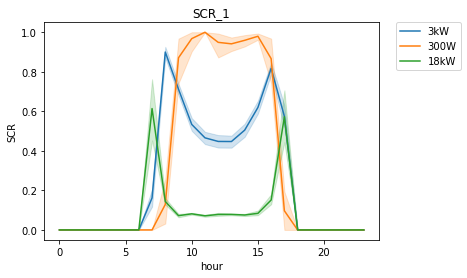

In [50]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_1')
plt.show()

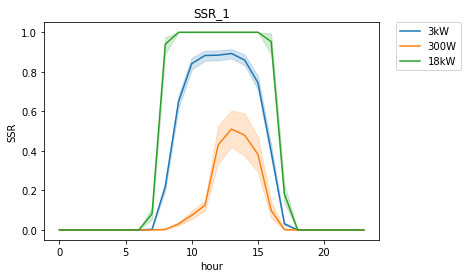

In [51]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_1')
plt.show()

<hr>

### 2022.02

In [52]:
df_all_hour_22_2 = df_all_hour[df_all_hour.ym == '2022/2']

In [53]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.464714  0.212160  0.219512  0.284205  0.406889   
         8    28.0  0.101560  0.052138  0.047676  0.069442  0.088419   
         9    28.0  0.078475  0.017167  0.051625  0.067875  0.073990   
         10   28.0  0.065265  0.016405  0.030218  0.054808  0.064727   
         11   28.0  0.075195  0.014014  0.048691  0.066701  0.076099   
         12   28.0  0.077787  0.014693  0.049559  0.067300  0.075201   
         13   28.0  0.076944  0.013449  0.052540  0.066834  0.074973   
         14   28.0  0.076096  0.015466  0.035074  0.071225  0.081668   
         15   28.0  0.082257  0.016246  0.058930  0.072914  0.077506   
         16   28.0  0.094823  0.027720  0.049465  0.076526  0.093970   
         17   28.0  0.322714  0.130793  0.188192  0.230140  0.278447   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    28.0  0.428571  0.503953  0.000000  0.000000  0.000000   
         9    28.0  0.964286  0.188982  0.000000  1.000000  1.000000   
         10   28.0  0.964286  0.188982  0.000000  1.000000  1.000000   
         11   28.0  0.964286  0.188982  0.000000  1.000000  1.000000   
         12   28.0  0.922927  0.202536  0.000000  0.930766  1.000000   
         13   28.0  0.927812  0.119709  0.565181  0.893275  1.000000   
         14   28.0  0.959854  0.086840  0.666707  0.952380  1.000000   
         15   28.0  0.943474  0.201126  0.000000  1.000000  1.000000   
         16   28.0  0.997619  0.012599  0.933332  1.000000  1.000000   
         17   28.0  0.678571  0.475595  0.000000  0.000000  1.000000   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   249.0  0.000000  0.000000  0.000000  0.0

In [54]:
# SSR(자가공급률)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.436851  0.212771  0.054320  0.273247  0.432006   
         8    28.0  0.994825  0.020387  0.900405  1.000000  1.000000   
         9    28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   28.0  0.997596  0.012723  0.932677  1.000000  1.000000   
         17   28.0  0.688624  0.216162  0.274564  0.488492  0.766623   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    28.0  0.007548  0.010264  0.000000  0.000000  0.000000   
         9    28.0  0.046608  0.027231  0.000000  0.031281  0.040016   
         10   28.0  0.096696  0.065377  0.000000  0.050520  0.081753   
         11   28.0  0.136448  0.098569  0.000000  0.070460  0.107917   
         12   28.0  0.379845  0.217727  0.000000  0.220612  0.351711   
         13   28.0  0.525388  0.247223  0.004980  0.369320  0.529245   
         14   28.0  0.428587  0.240242  0.055564  0.282275  0.406537   
         15   28.0  0.332933  0.228518  0.000000  0.163281  0.273407   
         16   28.0  0.205932  0.168849  0.030258  0.083619  0.158751   
         17   28.0  0.032791  0.033005  0.000000  0.000000  0.027082   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   249.0  0.000000  0.000000  0.000000  0.0

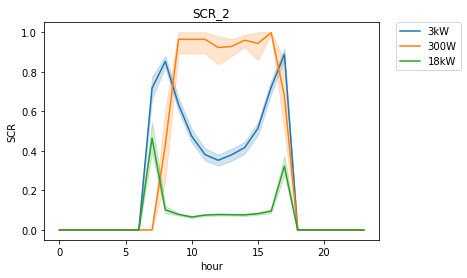

In [55]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_2')
plt.show()

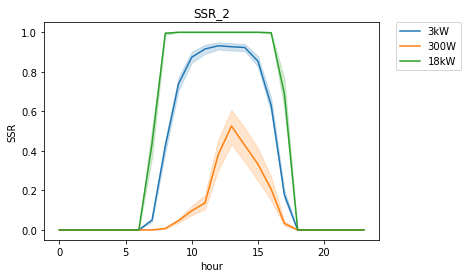

In [56]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_2')
plt.show()

<hr>

### 2022.03

In [57]:
df_all_hour_22_3 = df_all_hour[df_all_hour.ym == '2022/3']

In [58]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.187636  0.332344  0.000000  0.000000  0.000000   
         7    31.0  0.323279  0.228197  0.000000  0.173685  0.279297   
         8    31.0  0.142371  0.190054  0.038627  0.069160  0.083993   
         9    31.0  0.108776  0.050967  0.073323  0.082899  0.090020   
         10   31.0  0.080404  0.020086  0.056452  0.074643  0.076494   
         11   31.0  0.082609  0.031714  0.053059  0.070613  0.076115   
         12   31.0  0.102888  0.044834  0.074203  0.082565  0.092553   
         13   31.0  0.078876  0.053857  0.038025  0.062827  0.066002   
         14   31.0  0.104629  0.055844  0.066949  0.078760  0.093041   
         15   31.0  0.095925  0.066769  0.045956  0.066524  0.077439   
         16   31.0  0.127467  0.094842  0.064272  0.085991  0.101674   
         17   31.0  0.279186  0.198286  0.093489  0.150061  0.203187   
         18   31.0  0.362266  0.404840  0.000000  0.000000  0.268293   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.258065  0.444803  0.000000  0.000000  0.000000   
         8    31.0  0.774194  0.425024  0.000000  1.000000  1.000000   
         9    31.0  0.991937  0.044893  0.750048  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  0.973657  0.076501  0.692247  1.000000  1.000000   
         12   31.0  0.906277  0.213359  0.000000  0.918062  1.000000   
         13   31.0  0.905658  0.214131  0.000000  0.937974  1.000000   
         14   31.0  0.906541  0.218214  0.000000  0.955537  1.000000   
         15   31.0  0.907238  0.214398  0.000000  0.904549  1.000000   
         16   31.0  0.965454  0.108532  0.526321  1.000000  1.000000   
         17   31.0  0.895928  0.299533  0.000000  1.000000  1.000000   
         18   31.0  0.161290  0.373878  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.0

In [59]:
# SSR(자가공급률)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.078359  0.148354  0.000000  0.000000  0.000000   
         7    31.0  0.706653  0.334282  0.000000  0.478642  0.806976   
         8    31.0  0.957278  0.166032  0.124393  1.000000  1.000000   
         9    31.0  0.996416  0.019956  0.888889  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  0.996609  0.018878  0.894889  1.000000  1.000000   
         14   31.0  0.993346  0.027819  0.856140  1.000000  1.000000   
         15   31.0  0.990530  0.052724  0.706444  1.000000  1.000000   
         16   31.0  0.975228  0.096893  0.494208  1.000000  1.000000   
         17   31.0  0.856652  0.249822  0.055876  0.787196  1.000000   
         18   31.0  0.102378  0.141323  0.000000  0.000000  0.044432   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.007845  0.018076  0.000000  0.000000  0.000000   
         8    31.0  0.033189  0.044199  0.000000  0.011007  0.023851   
         9    31.0  0.121614  0.104208  0.011771  0.038242  0.111036   
         10   31.0  0.194084  0.138430  0.015396  0.069117  0.172428   
         11   31.0  0.249692  0.210598  0.013326  0.078924  0.216165   
         12   31.0  0.430837  0.294309  0.000000  0.168446  0.395134   
         13   31.0  0.447246  0.329378  0.000000  0.187322  0.333461   
         14   31.0  0.425750  0.319393  0.000000  0.140724  0.354896   
         15   31.0  0.401358  0.328519  0.000000  0.129042  0.257499   
         16   31.0  0.318705  0.276857  0.015168  0.104200  0.222158   
         17   31.0  0.139290  0.176548  0.000000  0.028384  0.065190   
         18   31.0  0.008963  0.022279  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.0

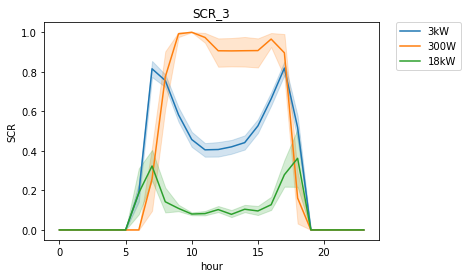

In [60]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_3')
plt.show()

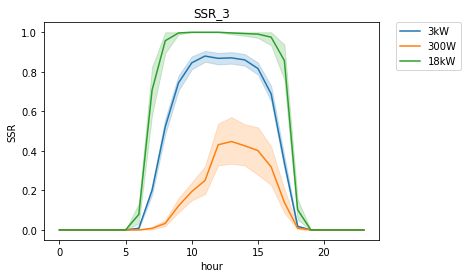

In [61]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_3')
plt.show()

<hr>

### 2022.04

In [62]:
df_all_hour_22_4 = df_all_hour[df_all_hour.ym == '2022/4']

In [63]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.033333  0.182574  0.000000  0.000000  0.000000   
         6    30.0  0.368339  0.242586  0.000000  0.223485  0.347981   
         7    30.0  0.249193  0.246484  0.109811  0.130898  0.157745   
         8    30.0  0.099209  0.059225  0.061613  0.070087  0.082141   
         9    30.0  0.090145  0.019352  0.058044  0.079579  0.088009   
         10   30.0  0.083203  0.014978  0.058357  0.075414  0.078605   
         11   30.0  0.079843  0.018804  0.056178  0.071299  0.077491   
         12   30.0  0.097239  0.028689  0.057789  0.087386  0.093138   
         13   30.0  0.084930  0.064607  0.037172  0.061681  0.075681   
         14   30.0  0.092368  0.024147  0.056853  0.080997  0.090904   
         15   30.0  0.094172  0.061612  0.056360  0.077194  0.080658   
         16   30.0  0.126214  0.166583  0.062908  0.082841  0.088766   
         17   30.0  0.215019  0.194605  0.086189  0.128477  0.158701   
         18   30.0  0.359451  0.186901  0.000000  0.237537  0.345025   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    22.0  0.909091  0.294245  0.000000  1.000000  1.000000   
         8    23.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         9    23.0  0.956522  0.208514  0.000000  1.000000  1.000000   
         10   23.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   23.0  0.994204  0.027798  0.866685  1.000000  1.000000   
         12   23.0  0.982557  0.050451  0.772732  1.000000  1.000000   
         13   23.0  0.977991  0.053229  0.750020  0.959999  1.000000   
         14   23.0  0.960411  0.079702  0.695668  0.957426  1.000000   
         15   23.0  0.983701  0.048994  0.772728  1.000000  1.000000   
         16   23.0  0.997283  0.013032  0.937500  1.000000  1.000000   
         17   23.0  0.956522  0.208514  0.000000  1.000000  1.000000   
         18   23.0  0.869565  0.344350  0.000000  1.000000  1.000000   
         19   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.003759  0.061314  0.000000  0.0

In [64]:
# SSR(자가공급률)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.003842  0.021041  0.000000  0.000000  0.000000   
         6    30.0  0.585540  0.284050  0.000000  0.421753  0.606891   
         7    30.0  0.912374  0.216928  0.195267  1.000000  1.000000   
         8    30.0  0.990031  0.054600  0.700943  1.000000  1.000000   
         9    30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   30.0  0.984994  0.082190  0.549828  1.000000  1.000000   
         16   30.0  0.970747  0.160224  0.122418  1.000000  1.000000   
         17   30.0  0.949502  0.198429  0.054329  1.000000  1.000000   
         18   30.0  0.475008  0.231899  0.000000  0.282700  0.530207   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    22.0  0.022424  0.018111  0.000000  0.012195  0.018020   
         8    23.0  0.031074  0.016528  0.011609  0.018770  0.025999   
         9    23.0  0.125871  0.056875  0.000000  0.103583  0.130516   
         10   23.0  0.134489  0.065483  0.025646  0.094082  0.131594   
         11   23.0  0.363427  0.171898  0.051240  0.280556  0.375038   
         12   23.0  0.506880  0.237416  0.029433  0.438727  0.529158   
         13   23.0  0.522672  0.247982  0.057101  0.406408  0.549771   
         14   23.0  0.536106  0.221945  0.093735  0.385505  0.567318   
         15   23.0  0.452767  0.241760  0.093735  0.273523  0.389209   
         16   23.0  0.363708  0.223809  0.029433  0.232508  0.313670   
         17   23.0  0.181538  0.122737  0.000000  0.096773  0.151358   
         18   23.0  0.035280  0.032555  0.000000  0.017104  0.025641   
         19   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000077  0.001256  0.000000  0.0

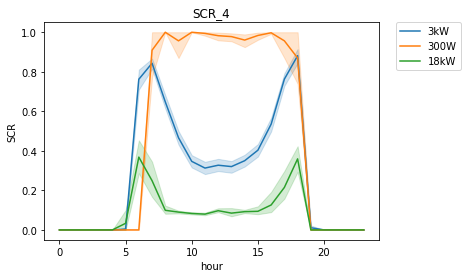

In [65]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_4')
plt.show()

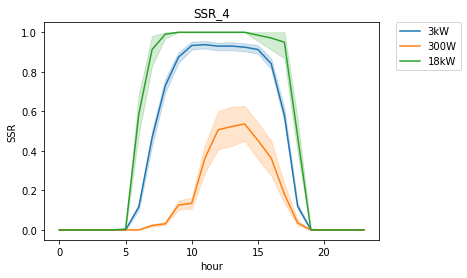

In [66]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_4')
plt.show()

<hr>

## **<계절>**

### 봄(Spring)

In [67]:
df_all_hour_spring = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [68]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.153005  0.346252  0.000000  0.000000  0.000000   
         6    92.0  0.287007  0.288061  0.000000  0.000000  0.221360   
         7    92.0  0.252467  0.225854  0.000000  0.122700  0.163615   
         8    92.0  0.121439  0.124356  0.038627  0.073239  0.089706   
         9    92.0  0.099600  0.043642  0.058044  0.079011  0.088260   
         10   92.0  0.083607  0.018938  0.056452  0.075240  0.079575   
         11   92.0  0.084938  0.031041  0.049481  0.071095  0.078158   
         12   92.0  0.096081  0.033328  0.047008  0.083153  0.092432   
         13   92.0  0.084357  0.049177  0.037172  0.063088  0.078363   
         14   92.0  0.098055  0.043892  0.043606  0.079984  0.091727   
         15   92.0  0.097405  0.061261  0.045956  0.069248  0.080658   
         16   92.0  0.127234  0.122220  0.062908  0.083996  0.094765   
         17   92.0  0.235459  0.199344  0.086189  0.128422  0.160848   
         18   92.0  0.370596  0.288167  0.000000  0.189229  0.322257   
         19   92.0  0.065217  0.248262  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    85.0  0.129412  0.337647  0.000000  0.000000  0.000000   
         7    84.0  0.619048  0.488538  0.000000  0.000000  1.000000   
         8    85.0  0.894118  0.309513  0.000000  1.000000  1.000000   
         9    85.0  0.973530  0.154416  0.000000  1.000000  1.000000   
         10   85.0  0.999020  0.009039  0.916666  1.000000  1.000000   
         11   85.0  0.986471  0.053374  0.692247  1.000000  1.000000   
         12   85.0  0.950621  0.140829  0.000000  0.954546  1.000000   
         13   85.0  0.947105  0.141845  0.000000  0.958331  1.000000   
         14   85.0  0.930530  0.180142  0.000000  0.954549  1.000000   
         15   85.0  0.941177  0.174706  0.000000  0.956521  1.000000   
         16   85.0  0.972940  0.127233  0.000000  1.000000  1.000000   
         17   85.0  0.903221  0.293404  0.000000  1.000000  1.000000   
         18   85.0  0.576471  0.497050  0.000000  0.000000  1.000000   
         19   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   818.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   813.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   817.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   819.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   817.0  0.097919  0.297387  0.000000  0.0

In [69]:
# SSR(자가공급률)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.036134  0.102652  0.000000  0.000000  0.000000   
         6    92.0  0.483633  0.405685  0.000000  0.000000  0.444718   
         7    92.0  0.857900  0.261946  0.000000  0.811021  1.000000   
         8    92.0  0.976022  0.107588  0.124393  1.000000  1.000000   
         9    92.0  0.997885  0.014410  0.888889  1.000000  1.000000   
         10   92.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   92.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   92.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   92.0  0.998857  0.010959  0.894889  1.000000  1.000000   
         14   92.0  0.997758  0.016283  0.856140  1.000000  1.000000   
         15   92.0  0.981466  0.095273  0.288398  1.000000  1.000000   
         16   92.0  0.973975  0.117769  0.122418  1.000000  1.000000   
         17   92.0  0.910795  0.218597  0.054329  1.000000  1.000000   
         18   92.0  0.428529  0.349027  0.000000  0.067686  0.410329   
         19   92.0  0.004815  0.018698  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    85.0  0.004955  0.014462  0.000000  0.000000  0.000000   
         7    84.0  0.021443  0.026726  0.000000  0.000000  0.013378   
         8    85.0  0.035511  0.034193  0.000000  0.016637  0.026481   
         9    85.0  0.127908  0.093754  0.000000  0.055578  0.123073   
         10   85.0  0.198185  0.138228  0.015396  0.086950  0.170547   
         11   85.0  0.309770  0.205741  0.013326  0.108691  0.304163   
         12   85.0  0.458692  0.275971  0.000000  0.217396  0.437232   
         13   85.0  0.481145  0.303398  0.000000  0.200026  0.437953   
         14   85.0  0.476152  0.290372  0.000000  0.234536  0.468086   
         15   85.0  0.411496  0.297109  0.000000  0.148133  0.349206   
         16   85.0  0.324209  0.260180  0.000000  0.093012  0.258085   
         17   85.0  0.165856  0.163627  0.000000  0.047605  0.120002   
         18   85.0  0.036435  0.050131  0.000000  0.000000  0.017506   
         19   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   818.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   813.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   817.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   819.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   817.0  0.003847  0.014117  0.000000  0.0

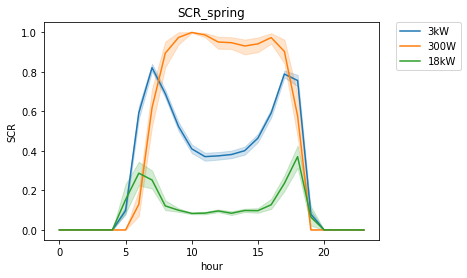

In [70]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_spring')
plt.show()

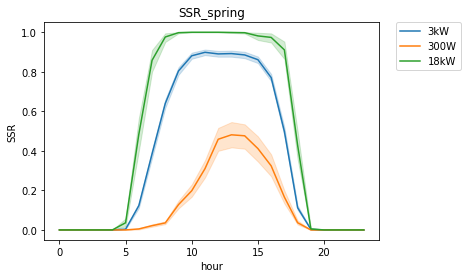

In [71]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_spring')
plt.show()

<hr>

### 여름(Summer)

In [72]:
df_all_hour_summer = df_all_hour[(df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') | (df_all_hour.ym == '2021/8')]

In [73]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.342719  0.427507  0.000000  0.000000  0.000000   
         6    92.0  0.332523  0.238069  0.000000  0.151483  0.267888   
         7    91.0  0.183810  0.165563  0.000000  0.111557  0.140641   
         8    91.0  0.126349  0.096691  0.053010  0.084310  0.095811   
         9    92.0  0.110565  0.063567  0.000000  0.082012  0.096145   
         10   92.0  0.118218  0.120521  0.049898  0.082539  0.096618   
         11   92.0  0.114258  0.105608  0.053530  0.083025  0.097016   
         12   92.0  0.110245  0.101173  0.056732  0.078735  0.091760   
         13   92.0  0.106919  0.070932  0.046645  0.078530  0.093715   
         14   92.0  0.110260  0.057703  0.000000  0.084104  0.100241   
         15   92.0  0.146217  0.151763  0.039872  0.087355  0.109338   
         16   89.0  0.150632  0.104107  0.000000  0.096556  0.115980   
         17   89.0  0.256128  0.203364  0.000000  0.136049  0.178488   
         18   89.0  0.511820  0.294586  0.000000  0.259766  0.446078   
         19   89.0  0.368269  0.462093  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.400000  0.492642  0.000000  0.000000  0.000000   
         7    90.0  0.822222  0.384467  0.000000  1.000000  1.000000   
         8    90.0  0.966667  0.180511  0.000000  1.000000  1.000000   
         9    90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   89.0  0.985683  0.106971  0.000000  1.000000  1.000000   
         11   89.0  0.983619  0.107197  0.000000  1.000000  1.000000   
         12   89.0  0.976064  0.110969  0.000000  1.000000  1.000000   
         13   90.0  0.979795  0.051932  0.739134  1.000000  1.000000   
         14   90.0  0.984313  0.045084  0.739134  1.000000  1.000000   
         15   90.0  0.969056  0.150955  0.000000  1.000000  1.000000   
         16   89.0  0.951622  0.208654  0.000000  1.000000  1.000000   
         17   89.0  0.953098  0.208333  0.000000  1.000000  1.000000   
         18   89.0  0.752809  0.433823  0.000000  1.000000  1.000000   
         19   89.0  0.089888  0.287641  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   811.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   814.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   803.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   796.0  0.264866  0.441341  0.000000  0.0

In [74]:
# SSR(자가공급률)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.088136  0.129328  0.000000  0.000000  0.000000   
         6    92.0  0.728972  0.311461  0.000000  0.567014  0.827135   
         7    91.0  0.938010  0.197095  0.000000  1.000000  1.000000   
         8    91.0  0.987573  0.050405  0.666893  1.000000  1.000000   
         9    92.0  0.988713  0.104290  0.000000  1.000000  1.000000   
         10   92.0  0.982687  0.117616  0.108770  1.000000  1.000000   
         11   92.0  0.979995  0.116739  0.072687  1.000000  1.000000   
         12   92.0  0.987683  0.095456  0.116316  1.000000  1.000000   
         13   92.0  0.994312  0.037049  0.665077  1.000000  1.000000   
         14   92.0  0.983826  0.109175  0.000000  1.000000  1.000000   
         15   92.0  0.968055  0.143348  0.027144  1.000000  1.000000   
         16   89.0  0.960577  0.160031  0.000000  1.000000  1.000000   
         17   89.0  0.938146  0.186117  0.000000  1.000000  1.000000   
         18   89.0  0.639896  0.347714  0.000000  0.353195  0.730731   
         19   89.0  0.043680  0.078678  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.014093  0.019313  0.000000  0.000000  0.000000   
         7    90.0  0.033597  0.028771  0.000000  0.011901  0.024559   
         8    90.0  0.054022  0.048745  0.000000  0.019286  0.039412   
         9    90.0  0.137943  0.087415  0.006668  0.083326  0.124040   
         10   89.0  0.240982  0.151035  0.000000  0.131170  0.224994   
         11   89.0  0.272432  0.177972  0.000000  0.127669  0.250012   
         12   89.0  0.333875  0.227783  0.000000  0.140032  0.323075   
         13   90.0  0.368478  0.261700  0.014278  0.131079  0.359511   
         14   90.0  0.353870  0.240338  0.014711  0.156141  0.325230   
         15   90.0  0.306392  0.224487  0.000000  0.108150  0.273028   
         16   89.0  0.234890  0.185059  0.000000  0.080003  0.196425   
         17   89.0  0.139724  0.136484  0.000000  0.040010  0.093022   
         18   89.0  0.043434  0.055517  0.000000  0.005619  0.021283   
         19   89.0  0.000708  0.002444  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   811.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   814.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   803.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   796.0  0.012829  0.030622  0.000000  0.0

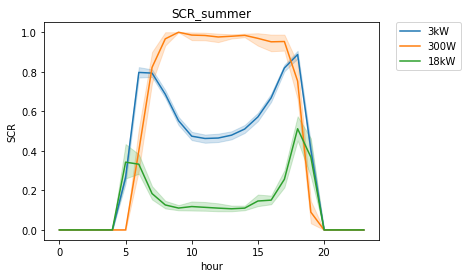

In [75]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_summer')
plt.show()

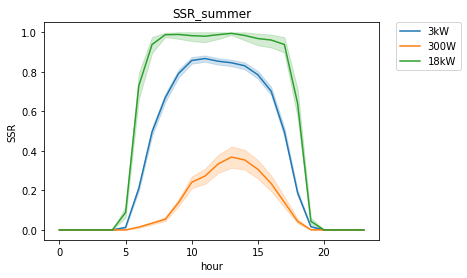

In [76]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_summer')
plt.show()

<hr>

### 가을(Autumn)

In [77]:
df_all_hour_autumn = df_all_hour[(df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') | (df_all_hour.ym == '2021/11')]

In [78]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.317409  0.410592  0.000000  0.000000  0.000000   
         7    91.0  0.217610  0.176977  0.000000  0.121952  0.167897   
         8    91.0  0.114638  0.106202  0.000000  0.081853  0.092598   
         9    91.0  0.111230  0.102503  0.036874  0.083431  0.093439   
         10   90.0  0.107498  0.118067  0.042635  0.070128  0.083192   
         11   91.0  0.101788  0.094595  0.039248  0.077796  0.083260   
         12   91.0  0.105217  0.066465  0.059879  0.082427  0.093446   
         13   91.0  0.113047  0.112422  0.054996  0.077515  0.091984   
         14   91.0  0.113449  0.096632  0.040873  0.083042  0.094179   
         15   91.0  0.114413  0.076373  0.047828  0.081611  0.096993   
         16   91.0  0.179308  0.107693  0.000000  0.121022  0.143275   
         17   91.0  0.331676  0.333051  0.000000  0.000000  0.269485   
         18   91.0  0.148482  0.343267  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    91.0  0.318681  0.468547  0.000000  0.000000  0.000000   
         8    91.0  0.846154  0.362800  0.000000  1.000000  1.000000   
         9    91.0  0.956044  0.206133  0.000000  1.000000  1.000000   
         10   91.0  0.989011  0.104828  0.000000  1.000000  1.000000   
         11   91.0  0.988668  0.033656  0.857123  1.000000  1.000000   
         12   90.0  0.964529  0.072089  0.642854  0.949998  1.000000   
         13   91.0  0.966842  0.071649  0.588230  0.975610  1.000000   
         14   91.0  0.945199  0.160070  0.000000  1.000000  1.000000   
         15   91.0  0.943336  0.206432  0.000000  1.000000  1.000000   
         16   91.0  0.886251  0.313676  0.000000  1.000000  1.000000   
         17   91.0  0.362637  0.483425  0.000000  0.000000  0.000000   
         18   90.0  0.055556  0.230345  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   805.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   806.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   797.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   801.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.001248  0.035333  0.000000  0.0

In [79]:
# SSR(자가공급률)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.095782  0.151962  0.000000  0.000000  0.000000   
         7    91.0  0.756066  0.283031  0.000000  0.587588  0.846640   
         8    91.0  0.974329  0.142690  0.000000  1.000000  1.000000   
         9    91.0  0.988889  0.101672  0.030540  1.000000  1.000000   
         10   90.0  0.982249  0.094137  0.274564  1.000000  1.000000   
         11   91.0  0.988180  0.071993  0.400244  1.000000  1.000000   
         12   91.0  0.992474  0.050603  0.634105  1.000000  1.000000   
         13   91.0  0.985912  0.103964  0.068244  1.000000  1.000000   
         14   91.0  0.989441  0.074282  0.369408  1.000000  1.000000   
         15   91.0  0.986963  0.080457  0.274564  1.000000  1.000000   
         16   91.0  0.944207  0.159536  0.000000  1.000000  1.000000   
         17   91.0  0.394018  0.392769  0.000000  0.000000  0.196199   
         18   91.0  0.024495  0.068188  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    91.0  0.009437  0.018619  0.000000  0.000000  0.000000   
         8    91.0  0.027164  0.021940  0.000000  0.011395  0.023282   
         9    91.0  0.098446  0.065532  0.000000  0.039636  0.093735   
         10   91.0  0.140949  0.101661  0.000000  0.056731  0.115441   
         11   91.0  0.254361  0.161530  0.020202  0.108211  0.219941   
         12   90.0  0.403103  0.253956  0.013877  0.209561  0.371822   
         13   91.0  0.389863  0.264021  0.023127  0.159746  0.341059   
         14   91.0  0.363523  0.259407  0.000000  0.142167  0.305140   
         15   91.0  0.278449  0.206287  0.000000  0.120825  0.263149   
         16   91.0  0.131670  0.152787  0.000000  0.037056  0.074089   
         17   91.0  0.037044  0.079103  0.000000  0.000000  0.000000   
         18   90.0  0.002996  0.014161  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   805.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   806.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   797.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   801.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.000015  0.000437  0.000000  0.0

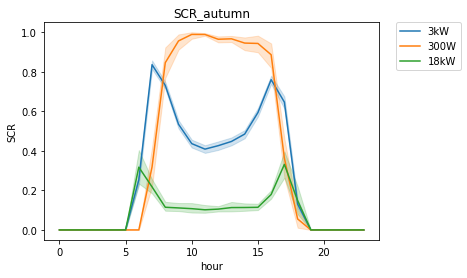

In [80]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_autumn')
plt.show()

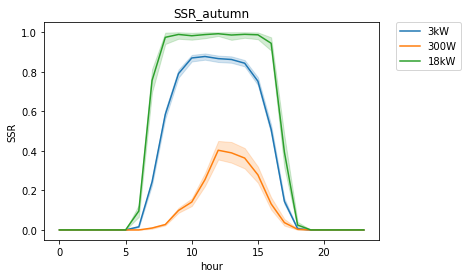

In [81]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_autumn')
plt.show()

<hr>

### 겨울(Winter)

In [82]:
df_all_hour_winter = df_all_hour[(df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') | (df_all_hour.ym == '2022/2')]

In [83]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.525506  0.371149  0.000000  0.255351  0.504098   
         8    90.0  0.130367  0.103334  0.047676  0.092573  0.113189   
         9    90.0  0.072967  0.027353  0.029958  0.055406  0.067866   
         10   90.0  0.077511  0.018268  0.030218  0.067400  0.078391   
         11   90.0  0.076931  0.015318  0.038317  0.071273  0.076252   
         12   90.0  0.077154  0.019237  0.046961  0.066075  0.075272   
         13   89.0  0.080508  0.014907  0.036973  0.073332  0.077791   
         14   90.0  0.077493  0.014633  0.035074  0.071169  0.078739   
         15   90.0  0.084216  0.023289  0.045598  0.072697  0.081835   
         16   90.0  0.167684  0.099390  0.049465  0.098526  0.140604   
         17   89.0  0.312225  0.340778  0.000000  0.000000  0.252427   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    89.0  0.224719  0.419762  0.000000  0.000000  0.000000   
         9    89.0  0.853933  0.355175  0.000000  1.000000  1.000000   
         10   90.0  0.966667  0.180511  0.000000  1.000000  1.000000   
         11   90.0  0.988889  0.105409  0.000000  1.000000  1.000000   
         12   90.0  0.951241  0.158414  0.000000  1.000000  1.000000   
         13   90.0  0.939773  0.138170  0.000000  0.938420  1.000000   
         14   90.0  0.962703  0.079989  0.666707  0.964285  1.000000   
         15   90.0  0.962088  0.156265  0.000000  1.000000  1.000000   
         16   90.0  0.819894  0.383734  0.000000  1.000000  1.000000   
         17   90.0  0.244444  0.432165  0.000000  0.000000  0.000000   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   796.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   798.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   799.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.000000  0.000000  0.000000  0.0

In [84]:
# SSR(자가공급률)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.203788  0.211306  0.000000  0.057523  0.115194   
         8    90.0  0.969196  0.102783  0.300598  1.000000  1.000000   
         9    90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   89.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   90.0  0.936754  0.126351  0.286775  0.917940  1.000000   
         17   89.0  0.280843  0.321380  0.000000  0.000000  0.170883   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    89.0  0.003971  0.008386  0.000000  0.000000  0.000000   
         9    89.0  0.038892  0.032617  0.000000  0.015628  0.032620   
         10   90.0  0.086889  0.067211  0.000000  0.037782  0.069057   
         11   90.0  0.169125  0.113481  0.000000  0.090938  0.140883   
         12   90.0  0.408066  0.242281  0.000000  0.208789  0.410282   
         13   90.0  0.479904  0.264501  0.000000  0.258784  0.494421   
         14   90.0  0.420964  0.280416  0.020855  0.186430  0.383842   
         15   90.0  0.319262  0.231346  0.000000  0.125016  0.264986   
         16   90.0  0.106342  0.138977  0.000000  0.027709  0.053859   
         17   90.0  0.010808  0.023750  0.000000  0.000000  0.000000   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   796.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   798.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   799.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.000000  0.000000  0.000000  0.0

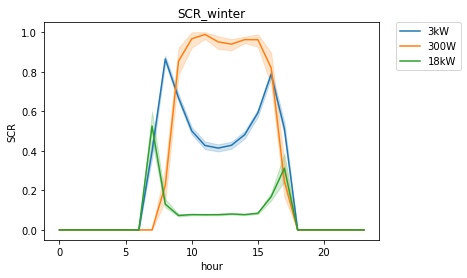

In [85]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_winter')
plt.show()

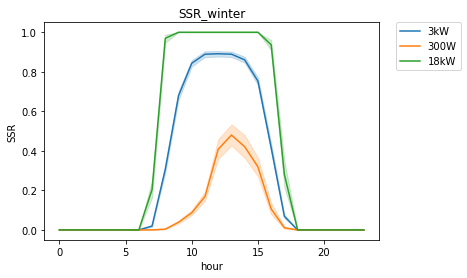

In [86]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_winter')
plt.show()

<hr>

## **<1년(total)>**

### 2021.05 ~ 2022.04

In [87]:
df_all_hour_year = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') |
                              (df_all_hour.ym == '2021/8') | (df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') |
                              (df_all_hour.ym == '2021/11') | (df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') |
                              (df_all_hour.ym == '2022/2') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [88]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                             
18kW     0    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    364.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    365.0  0.124949  0.309211  0.000000  0.000000  0.000000   
         6    365.0  0.235290  0.308281  0.000000  0.000000  0.132197   
         7    364.0  0.294098  0.281700  0.000000  0.120266  0.171995   
         8    364.0  0.123174  0.107905  0.000000  0.080955  0.096989   
         9    365.0  0.098696  0.067126  0.000000  0.072598  0.088026   
         10   364.0  0.096755  0.086671  0.030218  0.072764  0.083258   
         11   365.0  0.094555  0.074232  0.038317  0.073969  0.082252   
         12   365.0  0.097262  0.064639  0.046961  0.075758  0.088972   
         13   364.0  0.096291  0.072465  0.036973  0.072578  0.084306   
         14   365.0  0.099899  0.062235  0.000000  0.076428  0.089628   
         15   365.0  0.110696  0.093869  0.039872  0.076673  0.087966   
         16   362.0  0.156134  0.110105  0.000000  0.094999  0.121177   
         17   361.0  0.283735  0.278995  0.000000  0.116379  0.196953   
         18   362.0  0.257344  0.331957  0.000000  0.000000  0.000000   
         19   362.0  0.107116  0.301003  0.000000  0.000000  0.000000   
         20   361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   360.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    356.0  0.132022  0.338992  0.000000  0.000000  0.000000   
         7    355.0  0.436620  0.496667  0.000000  0.000000  0.000000   
         8    355.0  0.732394  0.443336  0.000000  0.000000  1.000000   
         9    355.0  0.945775  0.225611  0.000000  1.000000  1.000000   
         10   355.0  0.984908  0.118265  0.000000  1.000000  1.000000   
         11   355.0  0.986932  0.081355  0.000000  1.000000  1.000000   
         12   354.0  0.960711  0.124648  0.000000  1.000000  1.000000   
         13   356.0  0.958561  0.108524  0.000000  0.956523  1.000000   
         14   356.0  0.956010  0.129182  0.000000  1.000000  1.000000   
         15   356.0  0.954064  0.173214  0.000000  1.000000  1.000000   
         16   355.0  0.906573  0.283344  0.000000  1.000000  1.000000   
         17   355.0  0.610139  0.487371  0.000000  0.000000  1.000000   
         18   354.0  0.341808  0.474987  0.000000  0.000000  0.000000   
         19   355.0  0.022535  0.148626  0.000000  0.000000  0.000000   
         20   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   354.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   3230.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   3227.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   3235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   3227.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   3216.0  0.000000  0.000000  0.000000  0.000000  0.000000   

In [89]:
# SSR(자가공급률)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                             
18kW     0    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    364.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    365.0  0.031323  0.090141  0.000000  0.000000  0.000000   
         6    365.0  0.329523  0.397422  0.000000  0.000000  0.081529   
         7    364.0  0.690738  0.374047  0.000000  0.334195  0.938593   
         8    364.0  0.976799  0.105901  0.000000  1.000000  1.000000   
         9    365.0  0.993852  0.073166  0.000000  1.000000  1.000000   
         10   364.0  0.991235  0.075615  0.108770  1.000000  1.000000   
         11   365.0  0.992011  0.068997  0.072687  1.000000  1.000000   
         12   365.0  0.995019  0.054210  0.116316  1.000000  1.000000   
         13   364.0  0.994752  0.055540  0.068244  1.000000  1.000000   
         14   365.0  0.992725  0.066728  0.000000  1.000000  1.000000   
         15   365.0  0.984026  0.095595  0.027144  1.000000  1.000000   
         16   362.0  0.953944  0.142235  0.000000  1.000000  1.000000   
         17   361.0  0.631964  0.414966  0.000000  0.170883  0.873846   
         18   362.0  0.272388  0.367204  0.000000  0.000000  0.000000   
         19   362.0  0.011963  0.043930  0.000000  0.000000  0.000000   
         20   361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   360.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    356.0  0.004746  0.013291  0.000000  0.000000  0.000000   
         7    355.0  0.016011  0.025013  0.000000  0.000000  0.000000   
         8    355.0  0.030157  0.036620  0.000000  0.000000  0.020409   
         9    355.0  0.100583  0.082797  0.000000  0.033625  0.085694   
         10   355.0  0.166027  0.131843  0.000000  0.061541  0.131594   
         11   355.0  0.250549  0.174474  0.000000  0.104369  0.214301   
         12   354.0  0.400308  0.253118  0.000000  0.186984  0.382682   
         13   356.0  0.429015  0.277113  0.000000  0.166639  0.407816   
         14   356.0  0.402496  0.271256  0.000000  0.161929  0.363745   
         15   356.0  0.327598  0.245283  0.000000  0.125016  0.272586   
         16   355.0  0.197227  0.206882  0.000000  0.040427  0.110961   
         17   355.0  0.086977  0.130483  0.000000  0.000000  0.032236   
         18   354.0  0.020430  0.042378  0.000000  0.000000  0.000000   
         19   355.0  0.000178  0.001257  0.000000  0.000000  0.000000   
         20   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   354.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   3230.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   3227.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   3235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   3227.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   3216.0  0.000000  0.000000  0.000000  0.000000  0.000000   

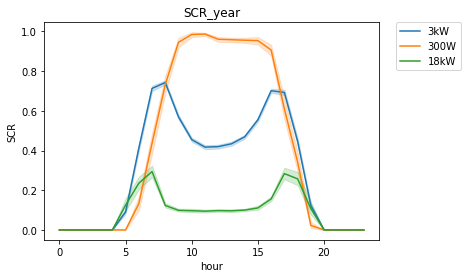

In [90]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_year')
plt.show()

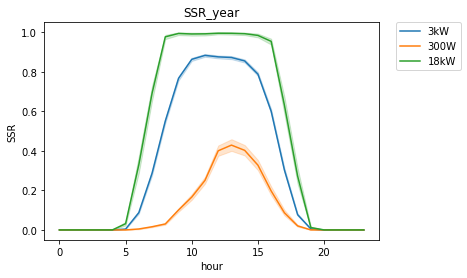

In [91]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_year')
plt.show()